In [1]:
import os
os.getcwd()
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Assignment 3 Part 1

In [79]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV,ParameterGrid
from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.cluster import MiniBatchKMeans
import random
%matplotlib inline

# 1.1

In [3]:
trainDat = pd.read_csv('titanic_train.csv')
testDat =  pd.read_csv('titanic_test.csv')

In [4]:
train_id = trainDat['PassengerId']
test_id = testDat['PassengerId']
trainDat1 = trainDat.drop(['PassengerId','Name','Ticket','Cabin'], 
                          axis = 1, inplace = False)
testDat1 = testDat.drop(['PassengerId','Name','Ticket','Cabin'], 
                        axis = 1, inplace = False)

After looking at the describe,info, and head of the training data, the features 'PassengerId','Name', 'Ticket', and 'Cabin' were all removed from the dataframes because they were either irrelevant to the passenger survival or there were too many missing values. 

In [5]:
trainDat1['Age'].fillna(trainDat1['Age'].median(), inplace=True)
testDat1['Age'].fillna(trainDat1['Age'].median(), inplace=True)

The missing values for 'Age' were imputed with the mean for that feature. 

In [6]:
trainDat1 = trainDat1.fillna(trainDat1.mode().iloc[0])
testDat1 = testDat1.fillna(trainDat1.mode().iloc[0])

The missing values for 'Embarked' were imputed with the mode for that feature.

In [7]:
trainDat1=pd.get_dummies(trainDat1, columns=["Pclass","Embarked","Sex"])
testDat1=pd.get_dummies(testDat1, columns=["Pclass","Embarked","Sex"])

The categorical variables were transformed into dummy/indicator variables using get_dummies.

# 1.2 & 1.3

In [8]:
testDat2 = trainDat1.sample(n=100,random_state=7)
trainDat1 = trainDat1[~(trainDat1.index).isin(testDat2.index)]
any(trainDat1.index.isin(testDat2.index))

False

100 random data records was set aside as the final test data set. The training data was also set up to ensure that the index matched the test data and the data didn't overlap.

In [9]:
X=trainDat1.loc[:,trainDat1.columns!='Survived'].to_numpy(copy=True)
y=trainDat1.Survived.to_numpy(copy=True)
np.random.seed(10)
reIndx=np.arange(len(X))
y = y[reIndx]
X = X[reIndx,:]

Training data was randomly shuffled here and converted to numpy arrays.

In [10]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state = 123))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=123))])

The pipeline is being set up in this step and the features are being standardized and prepared for the random forest classifier.

In [11]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [12]:
param_grid = dict(randomforestclassifier__n_estimators = [10,50,100,500,1000], 
                  randomforestclassifier__max_features = [1,2,3,4,5,6])

The hyperparameters that are going to be explored are defined here.

In [13]:
grid = GridSearchCV(pipe,param_grid,n_jobs=-1)
grid

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_features': [1, 2, 3, 4, 5,
                                                                  6],
                         'randomforestclassifier__n_estimators': [10, 50, 100,
                                                                  500, 1000]})

The grid search is set up here in this step.

In [14]:
gridFit = grid.fit(X,y)

In [15]:
print(pd.DataFrame(gridFit.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.026198      0.001929         0.003294        0.001380   
1        0.136683      0.013554         0.010752        0.001377   
2        0.238222      0.014936         0.022509        0.004828   
3        1.223388      0.025515         0.092529        0.011124   
4        2.357769      0.017211         0.191323        0.008285   
5        0.028716      0.002337         0.002678        0.000321   
6        0.129857      0.003908         0.010495        0.001913   
7        0.219790      0.008164         0.018155        0.001540   
8        1.210617      0.061057         0.092595        0.014122   
9        2.144212      0.066508         0.164028        0.011206   
10       0.021747      0.001647         0.002199        0.000345   
11       0.106623      0.003799         0.009153        0.001257   
12       0.221333      0.014994         0.019817        0.003187   
13       1.185644      0.016839         0.092392

In [16]:
gridFit.best_params_

{'randomforestclassifier__max_features': 3,
 'randomforestclassifier__n_estimators': 10}

The grid search was ran and the parameters for the model with the highest mean test score was determined above. The number of features used at a split was 4, the number of trees was 100, and the mean test score was 0.8148.

In [17]:
pipe2 = make_pipeline(StandardScaler(), 
                      GradientBoostingClassifier(random_state = 123))
pipe2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=123))])

In [18]:
pipe2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'gradientboostingclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'gradientboostingclassifier__ccp_alpha', 'gradientboostingclassifier__criterion', 'gradientboostingclassifier__init', 'gradientboostingclassifier__learning_rate', 'gradientboostingclassifier__loss', 'gradientboostingclassifier__max_depth', 'gradientboostingclassifier__max_features', 'gradientboostingclassifier__max_leaf_nodes', 'gradientboostingclassifier__min_impurity_decrease', 'gradientboostingclassifier__min_impurity_split', 'gradientboostingclassifier__min_samples_leaf', 'gradientboostingclassifier__min_samples_split', 'gradientboostingclassifier__min_weight_fraction_leaf', 'gradientboostingclassifier__n_estimators', 'gradientboostingclassifier__n_iter_no_change', 'gradientboostingclassifier__random_state', 'gradientboostingclassifier__subsample', 'gradientboostingclassifier__tol', 'gradientboostingclassifier__val

In [19]:
param_grid2 = dict(gradientboostingclassifier__n_estimators = [10,50,100,
                                                               500,1000], 
                   gradientboostingclassifier__learning_rate = [0.0001, 
                                                                0.001,0.01, 
                                                                0.1, 0.2,
                                                                0.3])

In [20]:
grid2 = GridSearchCV(pipe2,param_grid2,n_jobs=-1)
grid2

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.0001,
                                                                       0.001,
                                                                       0.01,
                                                                       0.1, 0.2,
                                                                       0.3],
                         'gradientboostingclassifier__n_estimators': [10, 50,
                                                                      100, 500,
                                                                      1000]})

In [21]:
gridFit2 = grid2.fit(X,y)

In [22]:
print(pd.DataFrame(gridFit2.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.016159      0.004714         0.001836        0.001868   
1        0.071037      0.003230         0.001079        0.000105   
2        0.121870      0.005995         0.001115        0.000019   
3        0.656145      0.067738         0.002832        0.000306   
4        1.406091      0.049579         0.004294        0.000418   
5        0.020483      0.004157         0.001173        0.000423   
6        0.071532      0.006636         0.000910        0.000143   
7        0.143090      0.012814         0.002554        0.001508   
8        0.662654      0.047877         0.002575        0.000109   
9        1.330081      0.088763         0.005301        0.000974   
10       0.015169      0.002257         0.000826        0.000043   
11       0.069072      0.009471         0.001007        0.000196   
12       0.139247      0.017180         0.001204        0.000178   
13       0.632670      0.036831         0.002624

In [23]:
gridFit2.best_params_

{'gradientboostingclassifier__learning_rate': 0.01,
 'gradientboostingclassifier__n_estimators': 500}

The gridsearch was ran for the gradient boosting classifier and the model with the highest mean test score was determined above. The learning rate was 0.3, the number of trees was 10, and the mean test score was 0.8379. This was determined to be the best model based on the grid searches. 

In [24]:
X2=testDat2.loc[:,testDat2.columns!='Survived'].to_numpy(copy=True)
y2=testDat2.Survived.to_numpy(copy=True)
np.random.seed(10)
reIndx=np.arange(len(X2))
y2 = y2[reIndx]
X2 = X2[reIndx,:]

In [25]:
gradientboost = GradientBoostingClassifier(random_state = 123, 
                                           n_estimators = 10, 
                                           learning_rate = 0.3)
gradientboost = gradientboost.fit(X2,y2)
testDat2pred = gradientboost.predict(X2)
print(f'F1 score : {f1_score(y2, testDat2pred)}')

F1 score : 0.9393939393939393


Utilizing the the set aside test data from earlier we used it as a final test for the model that was selected and a F1 score of 0.9333 was returned.

# 1.4

In [26]:
X=testDat1.loc[:,testDat1.columns!='Survived'].to_numpy(copy=True)
predy = gridFit2.predict(X)

In [27]:
submission4 = pd.DataFrame()
submission4['PassengerId'] = test_id
submission4['Survived'] = predy
submission4
submission4.to_csv('submission4.csv',index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Part 2

# 2.1

In [57]:
trainDat = pd.read_csv('train_digital.csv')
testDat =  pd.read_csv('test_digital.csv')

In [58]:
testDat2 = trainDat.sample(n=100,random_state=7)
trainDat2 = trainDat[~(trainDat.index).isin(testDat2.index)]
any(trainDat2.index.isin(testDat2.index))

False

100 random data records was set aside as the final test data set. The training data was also set up to ensure that the index matched the test data and the data didn't overlap.

In [30]:
X=trainDat2.loc[:,trainDat2.columns!='label'].to_numpy(copy=True)
y=trainDat2.label.to_numpy(copy=True)
np.random.seed(10)
reIndx=np.arange(len(X))
y = y[reIndx]
X = X[reIndx,:]

Training data was randomly shuffled here and converted to numpy arrays.

In [31]:
X = X/255

The pixels are divided by 255 so that they are all in the range [0,1]

In [32]:
param_grid = dict(n_estimators = [10,50,100,250], 
                  max_features = [1,2,3,4,5])

In [33]:
RF = RandomForestClassifier(random_state = 123)

In [34]:
grid = GridSearchCV(RF,param_grid,n_jobs=-1)
grid

GridSearchCV(estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 250]})

In [35]:
gridFit = grid.fit(X,y)

In [37]:
print(pd.DataFrame(gridFit.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.977673      0.478011         0.151957        0.020369   
1        3.518481      0.216144         0.347586        0.029059   
2        6.055263      0.097734         0.818119        0.107134   
3       16.850332      2.873108         2.821904        0.487983   
4        1.499277      0.511519         0.138390        0.057730   
5        6.415990      0.988412         0.866351        0.386062   
6        9.685760      1.261269         0.972980        0.290324   
7       19.579141      2.662761         2.178906        0.444642   
8        1.089438      0.058144         0.087990        0.010954   
9        3.586529      0.027729         0.295344        0.013888   
10       6.876091      0.052394         0.551158        0.014573   
11      17.250081      0.380541         1.800157        0.271431   
12       1.232698      0.175072         0.084634        0.005441   
13       4.047585      0.052114         0.288618

In [38]:
gridFit.best_params_

{'max_features': 5, 'n_estimators': 250}

After running the random forest classifier on the data set, the best model was determined to have 250 trees and 5 features used at the split. The mean test score was 0.9610.

# 2.2

In [41]:
pca=PCA(random_state=123)
pcaRes = pca.fit(X)

PCA was instantiated and fit the transformation here.

In [43]:
pcaRes.components_.shape
pcaRes.singular_values_.shape

(784, 784)

(784,)

Shows the number of components and singular values. This is correct as there was 784 features.

In [44]:
pcaRes.explained_variance_ratio_[:20]
np.sum(pcaRes.explained_variance_ratio_)

array([0.09751058, 0.07162264, 0.06144686, 0.05380525, 0.0489378 ,
       0.04300919, 0.03276619, 0.02891757, 0.02767343, 0.02348725,
       0.02098836, 0.02058547, 0.01701673, 0.01694095, 0.01581236,
       0.01483632, 0.01319632, 0.01282735, 0.01187899, 0.01152713])

1.0

In [46]:
evrSum=np.cumsum(pcaRes.explained_variance_ratio_)  
np.where(evrSum>=0.75)[0][0]

32

The number of components that account for at leat 75% of the total variation in X was determined to be 33 since 32 is the index value for the 33rd component. 

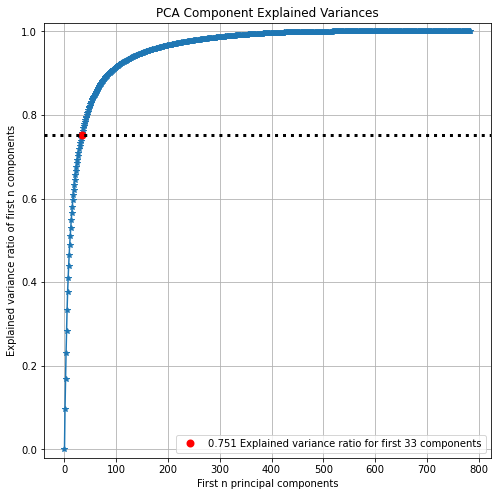

In [47]:
skplt.decomposition.plot_pca_component_variance(pcaRes,
            target_explained_variance=0.75,
            figsize=(8,8));

This is shown graphically in the sckit-plot above.

In [48]:
pcaRed=PCA(random_state=123, n_components=33)
Xred = pcaRed.fit_transform(X)
Xred.shape

(41900, 33)

The features were transformed to a space of 33 components here. 

In [50]:
gridFit2 = grid.fit(Xred,y)

In [51]:
print(pd.DataFrame(gridFit2.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.833543      0.055604         0.035409        0.003006   
1        3.697121      0.019553         0.150701        0.016850   
2        7.292985      0.077778         0.278086        0.005521   
3       18.424630      0.152585         0.729795        0.028460   
4        1.219197      0.026315         0.028212        0.001646   
5        6.030883      0.019792         0.126503        0.006219   
6       12.323860      0.115082         0.256269        0.007393   
7       30.037952      0.248601         0.624321        0.005051   
8        1.651668      0.014820         0.029009        0.003167   
9        9.105415      0.561963         0.120375        0.006349   
10      16.589582      0.087945         0.236431        0.010702   
11      41.333010      0.174277         0.583980        0.009805   
12       2.096411      0.035522         0.025374        0.001121   
13      10.786794      0.134892         0.113339

In [52]:
gridFit2.best_params_

{'max_features': 2, 'n_estimators': 250}

After running the random forest classifier on the transformed PCA data set, the best model was determined to have 250 trees and 2 features used at the split. The mean test score was 0.9533. This will be used on the test data.

In [70]:
X2 =testDat2.loc[:,testDat2.columns!='label'].to_numpy(copy=True)
y2 =testDat2.label.to_numpy(copy=True)
np.random.seed(10)
reIndx=np.arange(len(X2))
y2 = y2[reIndx]
X2 = X2[reIndx,:]
X2 = X2/255
pcaRed2=PCA(random_state=123, n_components=33)
Xred2 = pcaRed2.fit_transform(X2)
Xred2.shape

(100, 33)

In [71]:
RF = RandomForestClassifier(random_state = 123, n_estimators = 250, 
                            max_features = 2)
RF = RF.fit(Xred2,y2)
testDat2pred = RF.predict(Xred2)
testaccuracy = accuracy_score(y2,testDat2pred)
testaccuracy
print("Test Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))

1.0

Test Data Accuracy    :100.0 %


A test data accuracy was obtained as 100% using the model we tuned and used PCA with. 

# 2.3

In [74]:
X3 = testDat.to_numpy(copy=True)
X3 = X3/255
pcaRed3=PCA(random_state=123, n_components=33)
Xred3 = pcaRed3.fit_transform(X3)
predy = gridFit2.predict(Xred3)
predy.shape

(28000,)

In [75]:
submission5 = pd.DataFrame()
submission5['ImageId'] = range(1,28001)
submission5['Label'] = predy
submission5
submission5.to_csv('submission5.csv',index=False)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,4
...,...,...
27995,27996,3
27996,27997,3
27997,27998,3
27998,27999,3


The test data was transformed and applied to our best model to prepare for submission.

# 2.4 B

In [89]:
n_digits = len(np.unique(y))
print(n_digits)

10


In [90]:
kmeans = MiniBatchKMeans(n_clusters=n_digits)
kmeans.fit(X)

MiniBatchKMeans(n_clusters=10)

In [91]:
kmeans.labels_

array([8, 4, 5, ..., 1, 0, 1], dtype=int32)

K-means clustering was applied here and the labels of each input was generated from the K mean model.

In [83]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    # Loop through the clusters
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been 
    assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

To match with the real labels, the images were combined in the same group, the frequency distribution of the actual labels were checked, and the maximum frequent label was found and the label was set.

In [93]:
cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y[:20])

[1 0 1 4 0 5 7 3 5 5 7 7 1 3 3 1 3 5 7 6]
[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 2 0 7 5]


The results are shown here.

In [94]:
from sklearn.metrics import homogeneity_score

def calc_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    # Inertia
    inertia = estimator.inertia_
    print("Inertia: {}".format(inertia))
    # Homogeneity Score
    homogeneity = homogeneity_score(labels, estimator.labels_)
    print("Homogeneity score: {}".format(homogeneity))
    return inertia, homogeneity

In [95]:
from sklearn.metrics import accuracy_score

clusters = [10, 16, 36, 64, 144, 256]
iner_list = []
homo_list = []
acc_list = []

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X)
    
    inertia, homo = calc_metrics(estimator, X, y)
    iner_list.append(inertia)
    homo_list.append(homo)
    
    # Determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y)
    prediction = infer_data_labels(estimator.labels_, cluster_labels)
    
    acc = accuracy_score(y, prediction)
    acc_list.append(acc)
    print('Accuracy: {}\n'.format(acc))

MiniBatchKMeans(n_clusters=10)

Number of Clusters: 10
Inertia: 1674742.682074067
Homogeneity score: 0.4653325697528783
Accuracy: 0.5580668257756564



MiniBatchKMeans(n_clusters=16)

Number of Clusters: 16
Inertia: 1535997.1763716624
Homogeneity score: 0.5855907801295434
Accuracy: 0.679618138424821



MiniBatchKMeans(n_clusters=36)

Number of Clusters: 36
Inertia: 1372322.5310020307
Homogeneity score: 0.6907230733016712
Accuracy: 0.7642959427207637



MiniBatchKMeans(n_clusters=64)

Number of Clusters: 64
Inertia: 1268566.4158208342
Homogeneity score: 0.7368643587436916
Accuracy: 0.8092601431980907



MiniBatchKMeans(n_clusters=144)

Number of Clusters: 144
Inertia: 1143946.927184738
Homogeneity score: 0.8056284654966033
Accuracy: 0.8633412887828162



MiniBatchKMeans(n_clusters=256)

Number of Clusters: 256
Inertia: 1059643.7438796326
Homogeneity score: 0.8464180133548039
Accuracy: 0.8959665871121718



The clustering algorithm was evaluated here and it was determined that K = 256 had the highest accuracy and the lowest inertia out of all the other number of clusters tested. As a result, as the K-value is increased, the accuracy and homogeneity is also increased and the inertia is decreased.

MiniBatchKMeans(n_clusters=36)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

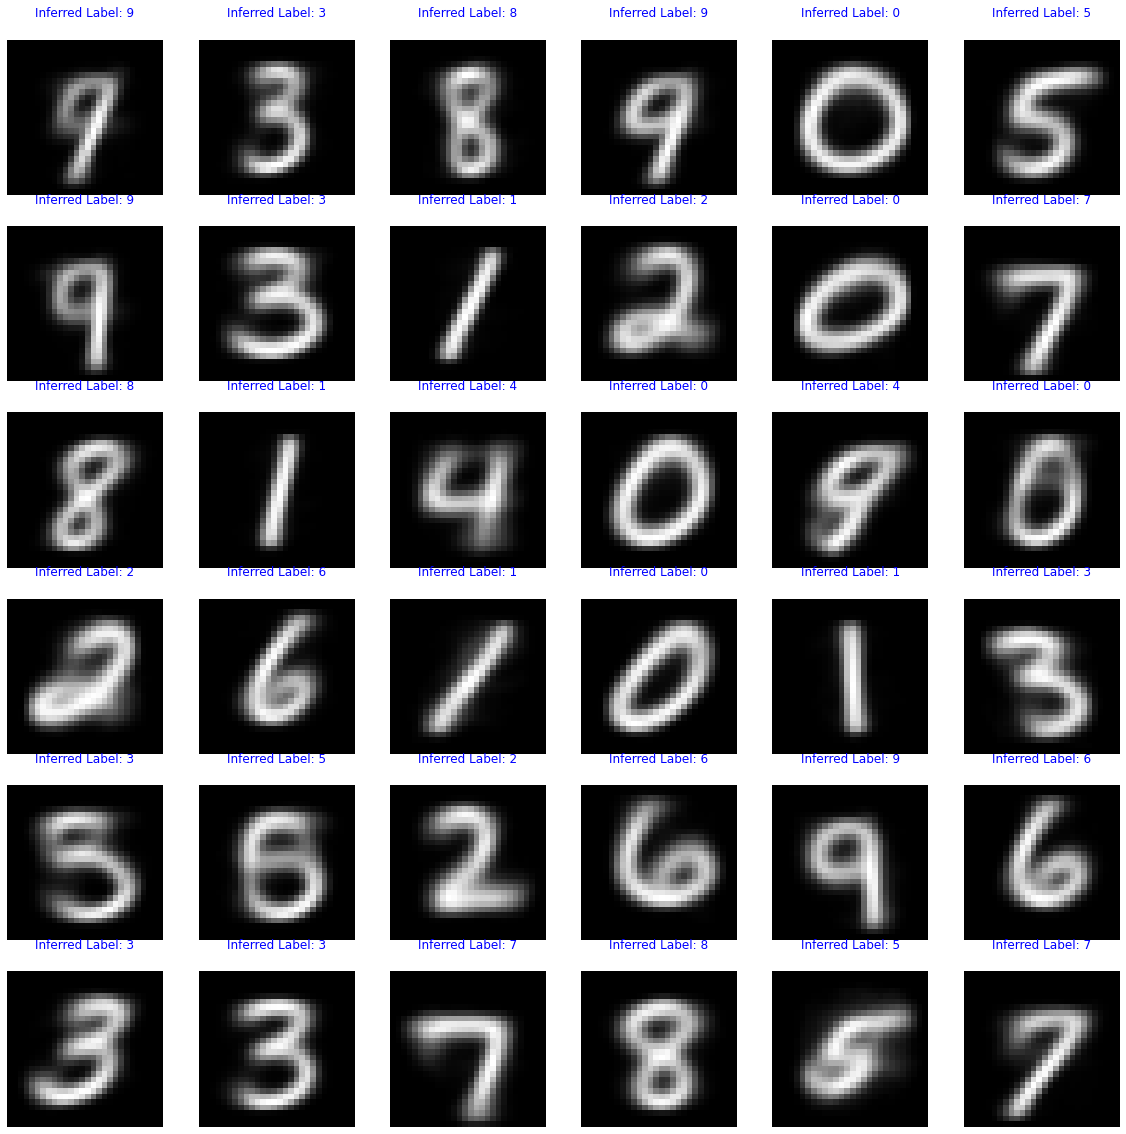

In [97]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, y)
prediction = infer_data_labels(kmeans.predict(X), cluster_labels)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():        
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key), color='blue')
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
plt.show()

The real images are visualized here.